In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
#from tess_sip import SIP
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
#import transitleastsquares as tls

%config InlineBackend.print_figure_kwargs={"facecolor" : "w"}

In [5]:
srs = lk.search_lightcurve("WASP50", author="SPOC", exptime=120)
display(srs)
lcs = srs.download_all(flux_column="pdcsap_flux")

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,382391899,0.0
1,TESS Sector 31,2020,SPOC,120,382391899,0.0


In [9]:
srs_tpfs = lk.search_targetpixelfile("WASP50", author="SPOC", exptime=120)
display(srs_tpfs)
tpfs = srs_tpfs.download_all()

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,382391899,0.0
1,TESS Sector 31,2020,SPOC,120,382391899,0.0


In [19]:
y = tpfs[0]
y.p

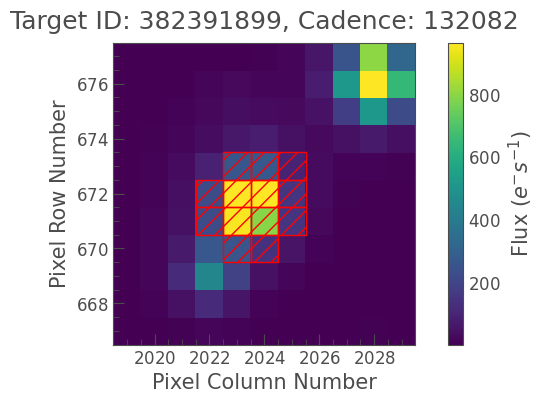

In [28]:
i = 1

fig = tpfs[0].plot(aperture_mask=tpfs[i].pipeline_mask)

plt.savefig(f"../../../ACCESS_WASP-50b/figures/stellar_activity/tpfs{i}.png", bbox_inches="tight")

In [ ]:
def check_cols(lc):
    print(lc.flux[0], lc.pdcsap_flux[0] / np.median(lc.pdcsap_flux))

In [ ]:
binsize = 0.5
lcs_binned = lk.LightCurveCollection(
    [
        data_oot(
            lc.remove_nans("flux").remove_nans("flux_err"),
            period, duration, t_0).flatten()
        .bin(
            time_bin_size=binsize,
        ).remove_nans("flux").remove_nans("flux_err").normalize()
        for lc in lcs
    ]
)

lcs_combined = lcs_binned.stitch().remove_nans()
lcs_combined.to_csv("/home/mango/Desktop/tess.csv", overwrite=True)

In [ ]:
pg = lcs_combined.to_periodogram(minimum_period=5, maximum_period=30)

pg.plot()

plt.show()

In [ ]:
pg.period_at_max_power

In [ ]:
lcs_combined.fold(pg.period_at_max_power).scatter()

plt.show()

In [ ]:
check_cols(lcs_binned[1])

In [ ]:
fig, ax = plt.subplots()

i = 1
lcs[i].normalize().scatter(ax=ax)
lcs_binned[i].scatter(ax=ax)


fig

In [ ]:
srs_tpfs = lk.search_targetpixelfile("WASP50", exptime=[120, 1800])
display(srs_tpfs)
tpfs = srs_tpfs.download_all()

In [ ]:
from astropy.time import Time

In [ ]:
P = 1.9550931258
t_0 = 2455558.61237
dur = 1.83 * (1.0 / 24.0)

lit_period = 1.955093
lit_transit_time = Time(2459169.669461, format='jd')
lit_duration = 1.8336 / 24.

In [ ]:
def oot_flux(lc, P, t_0, dur):
    in_transit = lc.create_transit_mask(P, t_0, dur)
    lc_oot = lc[~in_transit]
    return lc_oot

In [ ]:
P - lit_period, t_0 - lit_transit_time.value, dur - lit_duration

In [ ]:
lc.time

In [ ]:
lc = lcs.stitch().remove_nans()#.normalize()
#lc_oot = oot_flux(lc, P, t_0, dur)

#mask = lc.create_transit_mask(lit_period, lit_transit_time, lit_duration)
mask = lc.create_transit_mask(P, Time(t_0, format="jd"), dur)
lc_oot = lc[~mask].bin(0.25)

plt.scatter(lc.time.value, lc.flux)
plt.scatter(lc_oot.time.value, lc_oot.flux.value, s=2)

plt.show()

pg = lc_oot.to_periodogram(minimum_period=1, maximum_period=30)
pg.plot()
P_max = pg.period_at_max_power
print(P_max)
plt.show()

lc_oot.fold(P_max).scatter()
plt.show()

In [ ]:
np.allclose(y, y)

In [ ]:
for lc in lcs:
    print(np.allclose(lc.flux.value, lc.flux.value))

In [ ]:
np.allclose(lcs[1].flux.value, lc.flux.value)

In [ ]:
lc

In [ ]:
lcs[0]

In [ ]:
np.allt(lc.flux.value == lc.flux.value)

In [ ]:
lcs_binned[0][1:3]

In [ ]:
pg = lcs.stitch().normalize().bin(0.05).to_periodogram(minimum_period=5, maximum_period=30)
pg.plot()
plt.show()

In [ ]:
binsize = 0.4
lcs_binned = lk.LightCurveCollection(
    [lcs[0].bin(binsize), lcs[1].bin(binsize)]
)

sip_kwargs = {
    "min_period": 1.0,
    "max_period": 30.0,
    "nperiods": 200,
    #"bin_kwargs": {"time_bin_size": 12.0*u.hr.to("d")},
}

r = SIP(lcs_binned, **sip_kwargs)

l_corr = data_oot(r["corr_lc"], period, duration, t_0)

P_max = r["period_at_max_power"]
#P_max = r["periods"][np.argmax(p_div)]
#p_div = r["power"]/r["power_bkg"]
p_div = r["power"]

plt.plot(r["periods"], p_div)
#plt.axvline(P_max, "r--")

print(P_max)

l_corr.fold(P_max).scatter()

plt.show()

In [ ]:
r["corr_lc"].scatter()
plt.show()

In [ ]:
r["corr_lc"].to_csv("/home/mango/Desktop/tess.csv")

In [ ]:
f = l_corr.fold(P_max).flux.value

np.median

In [ ]:
pg = r["corr_lc"].to_periodogram(minimum_period=5, maximum_period=30)

pg.plot()

plt.show()

In [ ]:
fig, ax = plt.subplots()

#data_oot(lcs.stitch(), period, duration, t_0).scatter(ax=ax, label="raw")
#data_oot(l_corr, period, duration, t_0).scatter(ax=ax, label="corrected")

#plt.xlim(1400, 1450)
#plt.xlim(2100, 2200)

r["raw_lc"].scatter(ax=ax, label="raw")
r["corr_lc"].scatter(ax=ax, label="corr")

#ax.set_xlim(1400, 1450)
ax.set_ylim(0.95, 1.03)

plt.show()

In [ ]:
period = 1.9550931258
t_0 = 2455558.61237 
duration = 1.1 * 1.83 * (1.0 / 24.0) # 1.1x buffer

def data_oot(lc, period, duration, t_0):
    in_transit = tls.transit_mask(lc.time.jd, period, duration, t_0)
    return lc[~in_transit]

In [ ]:
import pandas as pd

In [ ]:
lcs_binned.stitch().to_csv("/home/mango/Desktop/tess.csv", overwrite=True)

In [ ]:
pg = lc.to_periodogram(minimum_period=5, maximum_period=30)

pg.plot()

P_max = pg.period_at_max_power
print(P_max)

plt.show()

In [ ]:
pg._LS_object.false_alarm_probability(0.0014, method="davies")

In [ ]:
pg._LS_object.false_alarm_probability(0.0014)

In [ ]:
fig, ax = plt.subplots()

lc_folded = lc.fold(P_max)#.remove_outliers(sigma=3)

lc_folded.scatter(ax=ax)
#lc_folded.bin(0.2).scatter(ax=ax, marker="x")

#plt.ylim(0.995, 1.005)

plt.show()